<a href="https://colab.research.google.com/github/MSalman62/MSalman62/blob/main/Cifar_10_Image_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cifar-10 Image Classifiction
The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

###Problem Definition
Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

##Importing Libraries

In [1]:
import numpy as np
# import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
# %load_ext tensorboard

##Loading Data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
print("x_train shape: ", np.shape(x_train))
print("x_test shape: ", np.shape(x_test))
print("y_train shape: ", np.shape(y_train))
print("y_test shape: ", np.shape(y_test))

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


##Data Processing

In [5]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [6]:
#normalizing data
x_train = x_train/255
x_test = x_test/255

In [7]:
# # Initializing Input vector
# class_vector =[2, 5, 6, 1, 4, 2, 3, 2]
# print(class_vector)

# # Applying the function on input class vector
# # from keras.utils import to_categorical
# output_matrix = to_categorical(class_vector, num_classes = 7, dtype ="int32")

# print(output_matrix)


In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

If we do not use it we will get this error.
ValueError: Shapes (None, 1) and (None, 10) are incompatible

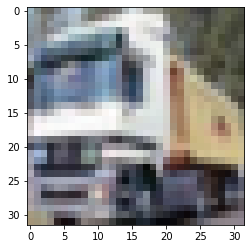

In [9]:
plt.imshow(x_train[1])

##Building Model

In [ ]:
# #step1-convolution
# custom_model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape = (32,32,3), activation='relu'))
# #step2-maxpooling
# custom_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
# #step3-flattening 
# custom_model.add(tf.keras.layers.Flatten())
# custom_model.add(tf.keras.layers.Dropout(0.5))
# custom_model.add(tf.keras.layers.Dense(128, activation='relu'))
# custom_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
#created empty model
custom_model = models.Sequential()

In [20]:
#adding layers to our model
custom_model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = x_train[0].shape, padding = 'same'))
# custom_model.add(layers.BatchNormalization())
custom_model.add(layers.MaxPooling2D((2, 2)))
custom_model.add(layers.Dropout(0.2))


custom_model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# custom_model.add(layers.BatchNormalization())
custom_model.add(layers.MaxPooling2D((2, 2)))
custom_model.add(layers.Dropout(0.2))

custom_model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
# custom_model.add(layers.BatchNormalization())
custom_model.add(layers.MaxPooling2D((2, 2)))

custom_model.add(layers.Flatten())
custom_model.add(layers.Dropout(0.5))

custom_model.add(layers.Dense(128, activation = "relu"))
custom_model.add(tf.keras.layers.Dropout(rate=0.5))
custom_model.add(layers.Dense(10, activation = "softmax"))

In [21]:
optimizers = tf.keras.optimizers
custom_model.compile(loss='categorical_crossentropy',
optimizer = optimizers.RMSprop(learning_rate = 0.0001), metrics=['accuracy']
)

In [22]:
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)         

In [14]:
import pytz
from datetime import datetime

In [15]:
DateTimeNow = datetime.now(pytz.timezone('Asia/Karachi')).strftime("%Y-%m-%d  %H:%M:%S")
DateTimeNow

'2022-03-05  13:56:58'

In [16]:
path = 'log ' + DateTimeNow

In [ ]:
# tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir = path, histogram_freq=1)

In [17]:
batchsize = 32

In [23]:
history = custom_model.fit(x_train, y_train, validation_split = 0.1, shuffle=True, epochs = 50, batch_size = 32)

Epoch 1/50
1407/1407 [==============================] - 18s 12ms/step - loss: 2.0625 - accuracy: 0.2323 - val_loss: 1.8508 - val_accuracy: 0.3402
Epoch 2/50
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7765 - accuracy: 0.3485 - val_loss: 1.6409 - val_accuracy: 0.4102
Epoch 3/50
1407/1407 [==============================] - 18s 12ms/step - loss: 1.6390 - accuracy: 0.3982 - val_loss: 1.5090 - val_accuracy: 0.4598
Epoch 4/50
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5482 - accuracy: 0.4316 - val_loss: 1.4128 - val_accuracy: 0.5034
Epoch 5/50
1407/1407 [==============================] - 16s 12ms/step - loss: 1.4795 - accuracy: 0.4636 - val_loss: 1.3446 - val_accuracy: 0.5268
Epoch 6/50
1407/1407 [==============================] - 16s 12ms/step - loss: 1.4308 - accuracy: 0.4804 - val_loss: 1.2815 - val_accuracy: 0.5494
Epoch 7/50
1407/1407 [==============================] - 16s 12ms/step - loss: 1.3824 - accuracy: 0.5011 - val_loss: 1.2863 -

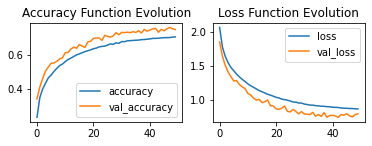

In [24]:
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

In [ ]:
score = custom_model.evaluate(x_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

In [ ]:
for i in enumerate(classes_name):
  print(i)

(0, 'Airplane')
(1, 'Automobile')
(2, 'Bird')
(3, 'Cat')
(4, 'Deer')
(5, 'Dog')
(6, 'Frog')
(7, 'Horse')
(8, 'Ship')
(9, 'Truck')


In [ ]:
classes_name = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}

In [27]:
y_predict = np.argmax(custom_model.predict(x_test), axis=1)


In [28]:
np.shape(y_predict)

(10000,)

AxesImage(54,36;334.8x217.44)


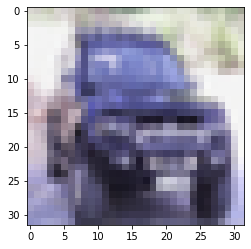

In [51]:
print(plt.imshow(x_test[9]))

In [45]:
pred = np.argmax(custom_model.predict(np.array([x_test[77], x_test[9]])), axis=1)
# classes_name[pred[0]]
pred

array([3, 1])